In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import joblib

In [33]:
dataset = pd.read_csv("E:\machine learning\datasets\drug200.csv")
dataset.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


    Drug Sex  Count
0  drugA   F      9
1  drugA   M     14
2  drugB   F      6
3  drugB   M     10
4  drugC   F      7
5  drugC   M      9
6  drugX   F     27
7  drugX   M     27
8  drugY   F     47
9  drugY   M     44


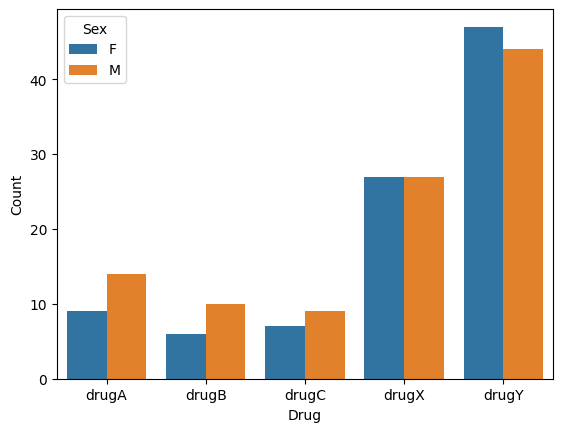

    Drug Cholesterol  Count
0  drugA        HIGH     12
1  drugA      NORMAL     11
2  drugB        HIGH      8
3  drugB      NORMAL      8
4  drugC        HIGH     16
5  drugX        HIGH     20
6  drugX      NORMAL     34
7  drugY        HIGH     47
8  drugY      NORMAL     44


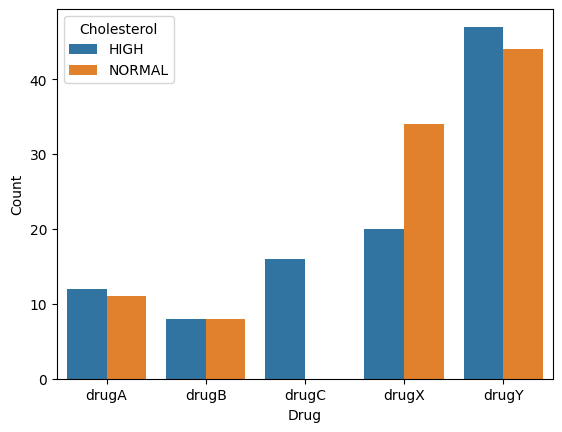

    Drug      BP  Count
0  drugA    HIGH     23
1  drugB    HIGH     16
2  drugC     LOW     16
3  drugX     LOW     18
4  drugX  NORMAL     36
5  drugY    HIGH     38
6  drugY     LOW     30
7  drugY  NORMAL     23


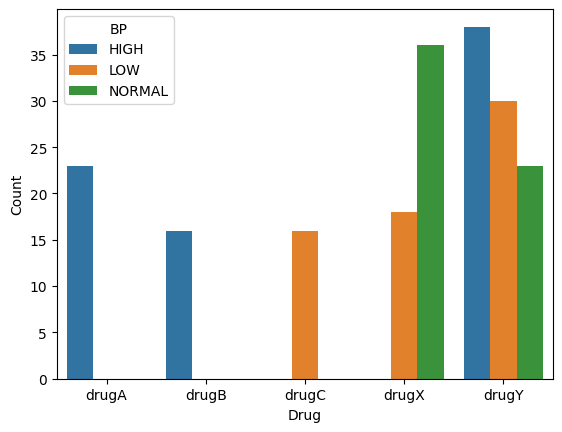

In [34]:
for i in ['Sex', 'Cholesterol', 'BP']:
    data = dataset.groupby(['Drug', i]).size().reset_index(name='Count')
    sns.barplot(x=data['Drug'], y=data['Count'], hue=data[i])
    print(data)
    plt.show()

In [35]:
d = {'F':0,'M':1}
data_S = dataset['Sex'].map(d)

d = {'HIGH':0,'NORMAL':1}
data_c = dataset['Cholesterol'].map(d)

d= {'HIGH':0,'NORMAL':1,'LOW':2}
data_B = dataset['BP'].map(d)

dataset['Sex'] = data_S
dataset['Cholesterol'] = data_c
dataset['BP'] = data_B

dataset.head(20)

    Age  Sex  BP  Cholesterol  Na_to_K   Drug
0    23    0   0            0   25.355  drugY
1    47    1   2            0   13.093  drugC
2    47    1   2            0   10.114  drugC
3    28    0   1            0    7.798  drugX
4    61    0   2            0   18.043  drugY
5    22    0   1            0    8.607  drugX
6    49    0   1            0   16.275  drugY
7    41    1   2            0   11.037  drugC
8    60    1   1            0   15.171  drugY
9    43    1   2            1   19.368  drugY
10   47    0   2            0   11.767  drugC
11   34    0   0            1   19.199  drugY
12   43    1   2            0   15.376  drugY
13   74    0   2            0   20.942  drugY
14   50    0   1            0   12.703  drugX
15   16    0   0            1   15.516  drugY
16   69    1   2            1   11.455  drugX
17   43    1   0            0   13.972  drugA
18   23    1   2            0    7.298  drugC
19   32    0   0            1   25.974  drugY
0      0
1      1
2      1
3      

In [53]:
x = dataset.drop('Drug', axis=1)
y = dataset['Drug']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


In [54]:
model = DecisionTreeClassifier() #criterion='entropy', max_depth=5, splitter='best')

model = model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)

['drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugA' 'drugB' 'drugY' 'drugB' 'drugX'
 'drugC' 'drugY' 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugC' 'drugY' 'drugA' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugA']


In [57]:
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_mat = confusion_matrix(y_test, predictions)

In [60]:
joblib.dump(model, "./Decision_tree.joblib", compress=True)

['./Decision_tree.joblib']